# Acceptance rate schedule is robust

In [1]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

In [2]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
#from study_abc_noise.model import \
#    HodgkinHuxleyModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=10)

# population size
pop_size = 1000

# data
data = mv.get_model_noisy()(mv.p_true)

In [3]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme())

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    population_size=pop_size,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_acctemp-v2.db", data)
abc.run(max_nr_populations=np.inf)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-29 23:02:48.143277, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.2200e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [271.5010857691342].
INFO:ABC:t: 0, eps: 271.5010857691342.
DEBUG:Acceptor:Encountered pd=2.3513e+01 > c=2.2200e+01, thus weight=1.0048e+00.
INFO:ABC:Acceptance rate: 1000 / 3185 = 3.1397e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=2.3513e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [88.36854979982263, 135.7505428845671].
INFO:ABC:t: 1, eps: 88.36854979982263.
INFO:ABC:Acceptance rate: 1000 / 3529 = 2.8337e-01, ESS=9.1154e+02.
DEBUG:Acceptor:pdf_norm=2.3513e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [53.333370475484934, 44.184274899911316].
INFO:ABC:t: 2, eps: 44.184274899911316.
INFO:ABC:Acceptance rate: 1000 / 3936 = 2.5407e-01, ESS=8.5393e+02.
DEBUG:Acceptor:pdf_norm=2.3513e+01 for t=3.
DEBUG:Epsilon:Proposed temperatures for 3: [36.29172346043901

In [4]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=10, schemes=[pyabc.ExpDecayFixedRatioScheme(min_rate=0, max_rate=np.inf)])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    population_size=pop_size,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_temp10-v2.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-29 23:05:17.877777, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=1.6505e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [10].
INFO:ABC:t: 0, eps: 10.
DEBUG:Acceptor:Encountered pd=2.1577e+01 > c=1.6505e+01, thus weight=1.6608e+00.
DEBUG:Acceptor:Encountered pd=2.3557e+01 > c=1.6505e+01, thus weight=2.0244e+00.
DEBUG:Acceptor:Encountered pd=2.1607e+01 > c=1.6505e+01, thus weight=1.6657e+00.
DEBUG:Acceptor:Encountered pd=2.3010e+01 > c=1.6505e+01, thus weight=1.9166e+00.
DEBUG:Acceptor:Encountered pd=1.9545e+01 > c=1.6505e+01, thus weight=1.3554e+00.
DEBUG:Acceptor:Encountered pd=2.2947e+01 > c=1.6505e+01, thus weight=1.9046e+00.
DEBUG:Acceptor:Encountered pd=1.7547e+01 > c=1.6505e+01, thus weight=1.1098e+00.
DEBUG:Acceptor:Encountered pd=1.8506e+01 > c=1.6505e+01, thus weight=1.2216e+00.
DEBUG:Acceptor:Encountered pd=1.8174e+01 > c=1.6505e+01, thus weight=1.1817e+00.
DEBUG:Acceptor:Encountered

DEBUG:Acceptor:Encountered pd=2.3129e+01 > c=1.6505e+01, thus weight=1.9395e+00.
DEBUG:Acceptor:Encountered pd=1.9454e+01 > c=1.6505e+01, thus weight=1.3430e+00.
DEBUG:Acceptor:Encountered pd=1.8299e+01 > c=1.6505e+01, thus weight=1.1965e+00.
DEBUG:Acceptor:Encountered pd=2.2071e+01 > c=1.6505e+01, thus weight=1.7449e+00.
DEBUG:Acceptor:Encountered pd=2.1829e+01 > c=1.6505e+01, thus weight=1.7031e+00.
DEBUG:Acceptor:Encountered pd=1.8239e+01 > c=1.6505e+01, thus weight=1.1894e+00.
DEBUG:Acceptor:Encountered pd=1.9893e+01 > c=1.6505e+01, thus weight=1.4034e+00.
DEBUG:Acceptor:Encountered pd=1.8643e+01 > c=1.6505e+01, thus weight=1.2384e+00.
DEBUG:Acceptor:Encountered pd=2.1628e+01 > c=1.6505e+01, thus weight=1.6692e+00.
DEBUG:Acceptor:Encountered pd=1.7613e+01 > c=1.6505e+01, thus weight=1.1172e+00.
DEBUG:Acceptor:Encountered pd=2.1309e+01 > c=1.6505e+01, thus weight=1.6169e+00.
DEBUG:Acceptor:Encountered pd=2.2527e+01 > c=1.6505e+01, thus weight=1.8262e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.0358e+01 > c=1.6505e+01, thus weight=1.4701e+00.
DEBUG:Acceptor:Encountered pd=2.3665e+01 > c=1.6505e+01, thus weight=2.0463e+00.
DEBUG:Acceptor:Encountered pd=1.6515e+01 > c=1.6505e+01, thus weight=1.0010e+00.
DEBUG:Acceptor:Encountered pd=2.3677e+01 > c=1.6505e+01, thus weight=2.0488e+00.
DEBUG:Acceptor:Encountered pd=1.9915e+01 > c=1.6505e+01, thus weight=1.4064e+00.
DEBUG:Acceptor:Encountered pd=2.0152e+01 > c=1.6505e+01, thus weight=1.4402e+00.
DEBUG:Acceptor:Encountered pd=1.9358e+01 > c=1.6505e+01, thus weight=1.3302e+00.
DEBUG:Acceptor:Encountered pd=1.7361e+01 > c=1.6505e+01, thus weight=1.0894e+00.
DEBUG:Acceptor:Encountered pd=2.0416e+01 > c=1.6505e+01, thus weight=1.4787e+00.
DEBUG:Acceptor:Encountered pd=2.1654e+01 > c=1.6505e+01, thus weight=1.6735e+00.
DEBUG:Acceptor:Encountered pd=2.1462e+01 > c=1.6505e+01, thus weight=1.6418e+00.
DEBUG:Acceptor:Encountered pd=1.7120e+01 > c=1.6505e+01, thus weight=1.0635e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=1.9174e+01 > c=1.6505e+01, thus weight=1.3060e+00.
DEBUG:Acceptor:Encountered pd=2.1159e+01 > c=1.6505e+01, thus weight=1.5927e+00.
DEBUG:Acceptor:Encountered pd=2.2492e+01 > c=1.6505e+01, thus weight=1.8198e+00.
DEBUG:Acceptor:Encountered pd=1.9569e+01 > c=1.6505e+01, thus weight=1.3586e+00.
DEBUG:Acceptor:Encountered pd=2.2211e+01 > c=1.6505e+01, thus weight=1.7695e+00.
DEBUG:Acceptor:Encountered pd=1.6956e+01 > c=1.6505e+01, thus weight=1.0461e+00.
DEBUG:Acceptor:Encountered pd=2.2651e+01 > c=1.6505e+01, thus weight=1.8490e+00.
DEBUG:Acceptor:Encountered pd=1.9913e+01 > c=1.6505e+01, thus weight=1.4062e+00.
DEBUG:Acceptor:Encountered pd=1.7168e+01 > c=1.6505e+01, thus weight=1.0686e+00.
DEBUG:Acceptor:Encountered pd=2.1291e+01 > c=1.6505e+01, thus weight=1.6138e+00.
DEBUG:Acceptor:Encountered pd=1.7962e+01 > c=1.6505e+01, thus weight=1.1569e+00.
DEBUG:Acceptor:Encountered pd=2.2720e+01 > c=1.6505e+01, thus weight=1.8618e+00.
DEBUG:Acceptor:Encountered p

In [5]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=10000, schemes=[pyabc.ExpDecayFixedRatioScheme(min_rate=0, max_rate=np.inf)])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    population_size=pop_size,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_temp10000-v2.db", data)
abc.run(max_nr_populations=np.inf)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-29 23:06:20.806608, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.1467e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [10000].
INFO:ABC:t: 0, eps: 10000.
DEBUG:Acceptor:Encountered pd=2.1493e+01 > c=2.1467e+01, thus weight=1.0000e+00.
INFO:ABC:Acceptance rate: 1000 / 1079 = 9.2678e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=2.1493e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [5000.0].
INFO:ABC:t: 1, eps: 5000.0.
DEBUG:Acceptor:Encountered pd=2.2270e+01 > c=2.1493e+01, thus weight=1.0002e+00.
DEBUG:Acceptor:Encountered pd=2.3013e+01 > c=2.1493e+01, thus weight=1.0003e+00.
INFO:ABC:Acceptance rate: 1000 / 1122 = 8.9127e-01, ESS=9.3450e+02.
DEBUG:Acceptor:pdf_norm=2.3013e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [2500.0].
INFO:ABC:t: 2, eps: 2500.0.
DEBUG:Acceptor:Encountered pd=2.3220e+01 > c=2.3013e+01, thus weight=1.0001e+00.
INFO:ABC:Acceptance rate: 1000 / 1200 =

In [21]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=1000, schemes=[pyabc.ExpDecayFixedRatioScheme(min_rate=0, max_rate=np.inf)])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    population_size=pop_size,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_temp1000-v2.db", data)
abc.run(max_nr_populations=np.inf)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-23 22:04:54.588245, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.3458e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [1000].
INFO:ABC:t: 0, eps: 1000.
DEBUG:Acceptor:Encountered pd=2.5788e+01 > c=2.3458e+01, thus weight=1.0023e+00.
DEBUG:Acceptor:Encountered pd=2.3617e+01 > c=2.3458e+01, thus weight=1.0002e+00.
DEBUG:Acceptor:Encountered pd=2.5659e+01 > c=2.3458e+01, thus weight=1.0022e+00.
INFO:ABC:Acceptance rate: 1000 / 1674 = 5.9737e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=2.5788e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [500.0].
INFO:ABC:t: 1, eps: 500.0.
INFO:ABC:Acceptance rate: 1000 / 1826 = 5.4765e-01, ESS=9.0514e+02.
DEBUG:Acceptor:pdf_norm=2.5788e+01 for t=2.
DEBUG:Epsilon:ExpDecayFixedRatioScheme: Reacting to high acceptance rate.
DEBUG:Epsilon:Proposed temperatures for 2: [125.0].
INFO:ABC:t: 2, eps: 125.0.
INFO:ABC:Acceptance rate: 1000 / 3803 = 2.6295e-01, 

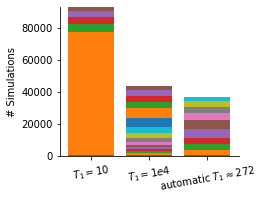

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pyabc

h_acctemp = pyabc.History("sqlite:///h_cr_acctemp-v2.db")
h_temp10 = pyabc.History("sqlite:///h_cr_temp10-v2.db")
h_temp1000 = pyabc.History("sqlite:///h_cr_temp1000-v2.db")
h_temp10000 = pyabc.History("sqlite:///h_cr_temp10000-v2.db")
histories = [h_temp10, h_temp10000, h_acctemp]
labels = [r"$T_1 = 10$", r"$T_1 = 1e4$", r"automatic $T_1 \approx 272$"]

fig, ax = plt.subplots()
pyabc.visualization.plot_sample_numbers(histories, labels, rotation=10, ax=ax)

#bars = [rect for rect in ax.get_children() if isinstance(rect, mpl.patches.Rectangle)]
#for bar in bars:
#    bar.set_color('white')
#    bar.set_edgecolor('grey')

ax.set_title(None)
ax.set_xlabel(None)
ax.set_ylabel("# Simulations")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gcf().set_size_inches((3, 3))
for fmt in ['svg', 'eps']:
    plt.savefig(f"cr_fixed_T1.{fmt}", format=fmt)